In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/arketing-campaign/marketing_campaign.csv
/kaggle/input/arketing-campaign/marketing_campaign.xlsx


In [2]:
data=pd.read_csv('/kaggle/input/arketing-campaign/marketing_campaign.csv',sep=';')
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
data.Income=data.Income.fillna(0)

In [4]:
data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [5]:
data.Dt_Customer=pd.to_datetime(data.Dt_Customer,dayfirst=False)
data[['year']]=pd.DataFrame(data.Dt_Customer.dt.year)
data[['month']]=pd.DataFrame(data.Dt_Customer.dt.month)
data[['day']]=pd.DataFrame(data.Dt_Customer.dt.day)

In [6]:
x=data.drop(columns=['ID','Response','Dt_Customer'])
x

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,year,month,day
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,0,0,0,0,0,3,11,2012,9,4
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,0,0,0,0,0,3,11,2014,3,8
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,0,0,0,0,0,3,11,2013,8,21
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,0,0,0,0,0,3,11,2014,2,10
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,0,0,0,0,0,3,11,2014,1,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,46,709,43,182,...,0,0,0,0,0,3,11,2013,6,13
2236,1946,PhD,Together,64014.0,2,1,56,406,0,30,...,0,0,1,0,0,3,11,2014,6,10
2237,1981,Graduation,Divorced,56981.0,0,0,91,908,48,217,...,1,0,0,0,0,3,11,2014,1,25
2238,1956,Master,Together,69245.0,0,1,8,428,30,214,...,0,0,0,0,0,3,11,2014,1,24


In [7]:
y=data.Response
y.head()

0    1
1    0
2    0
3    0
4    0
Name: Response, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35)

In [9]:
x.head(5)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,year,month,day
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,0,0,0,0,0,3,11,2012,9,4
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,0,0,0,0,0,3,11,2014,3,8
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,0,0,0,0,0,3,11,2013,8,21
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,0,0,0,0,0,3,11,2014,2,10
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,0,0,0,0,0,3,11,2014,1,19


In [10]:
x.dtypes

Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
year                     int64
month                    int64
day                      int64
dtype: object

In [11]:
x[['MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','AcceptedCmp3']]

,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3
0,172,88,88,3,8,10,4,7,0
1,2,1,6,2,1,1,2,5,0
2,111,21,42,1,8,2,10,4,0
3,10,3,5,2,2,0,4,6,0
4,46,27,15,5,5,3,6,5,0
...,...,...,...,...,...,...,...,...,...
2235,42,118,247,2,9,3,4,5,0
2236,0,0,8,7,8,2,5,7,0
2237,32,12,24,1,2,3,13,6,0
2238,80,30,61,2,6,5,10,3,0


In [12]:
nom_cols=[2]
ord_cols=[1]

In [13]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn import set_config
trans=make_column_transformer((OneHotEncoder(sparse=False),nom_cols),(OrdinalEncoder(),ord_cols),remainder='passthrough')
set_config(display='diagram')
trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(sparse=False),
                                 [2]),
                                ('ordinalencoder', OrdinalEncoder(), [1])])

In [14]:
from sklearn.neighbors import KNeighborsClassifier
algo=KNeighborsClassifier(n_neighbors=300)
algo

KNeighborsClassifier(n_neighbors=300)

In [15]:
from sklearn.pipeline import make_pipeline
pipe=make_pipeline(trans,algo)
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [2]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [1])])),
                ('kneighborsclassifier',
                 KNeighborsClassifier(n_neighbors=300))])

In [16]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [2]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [1])])),
                ('kneighborsclassifier',
                 KNeighborsClassifier(n_neighbors=300))])

In [17]:
pred=pipe.predict(x_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)*100

85.96938775510205

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Response', ylabel='Density'>

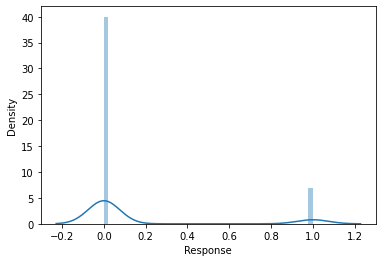

In [19]:
import seaborn as sns
sns.distplot(data.Response)

In [20]:
from imblearn.over_sampling import RandomOverSampler
over=RandomOverSampler()
o_x,o_y=over.fit_resample(x,y)
o_y.value_counts()

1    1906
0    1906
Name: Response, dtype: int64

In [21]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
s=SMOTE()
n_pipe=make_pipeline(trans,s,algo)
n_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [2]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [1])])),
                ('smote', SMOTE()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(n_neighbors=300))])

In [22]:
n_pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [2]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [1])])),
                ('smote', SMOTE()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(n_neighbors=300))])

In [23]:
pred_n=n_pipe.predict(x_test)
pred_n

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [24]:
accuracy_score(pred_n,y_test)*100

73.85204081632652

In [25]:
from sklearn.linear_model import LogisticRegression
algo_l=LogisticRegression(solver='liblinear')
algo_l

LogisticRegression(solver='liblinear')

In [26]:
pipe_l=make_pipeline(trans,algo_l)
pipe_l

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [2]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [1])])),
                ('logisticregression', LogisticRegression(solver='liblinear'))])

In [27]:
pipe_l.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [2]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [1])])),
                ('logisticregression', LogisticRegression(solver='liblinear'))])

In [28]:
pred_l=pipe_l.predict(x_test)
pred_l

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [29]:
accuracy_score(pred_l,y_test)*100

87.62755102040816

In [30]:
from sklearn.svm import LinearSVC
algo_svc=LinearSVC()
algo_svc

LinearSVC()

In [31]:
pipe_svc=make_pipeline(trans,algo_svc)
pipe_svc

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [2]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [1])])),
                ('linearsvc', LinearSVC())])

In [32]:
pipe_svc.fit(x_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [2]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [1])])),
                ('linearsvc', LinearSVC())])

In [33]:
pred_svc=pipe_svc.predict(x_test)
pred_svc

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [34]:
accuracy_score(pred_svc,y_test)*100

83.80102040816327

In [35]:
from sklearn.tree import DecisionTreeClassifier
algo_d=DecisionTreeClassifier()

In [36]:
from sklearn.model_selection import GridSearchCV
params={'criterion':['gini','entropy'],'max_depth':[None,2,5,10],'min_samples_split':[2,10,100]}
pipe_g=make_pipeline(trans,GridSearchCV(algo_d,params,verbose=3,refit=True))
pipe_g

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [2]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [1])])),
                ('gridsearchcv',
                 GridSearchCV(estimator=DecisionTreeClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [None, 2, 5, 10],
                                          'min_samples_split': [2, 10, 100]},
                              verbose=3))])

In [37]:
pipe_g.fit(x_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] criterion=gini, max_depth=None, min_samples_split=2 .............
[CV]  criterion=gini, max_depth=None, min_samples_split=2, score=0.788, total=   0.0s
[CV] criterion=gini, max_depth=None, min_samples_split=2 .............
[CV]  criterion=gini, max_depth=None, min_samples_split=2, score=0.832, total=   0.0s
[CV] criterion=gini, max_depth=None, min_samples_split=2 .............
[CV]  criterion=gini, max_depth=None, min_samples_split=2, score=0.845, total=   0.0s
[CV] criterion=gini, max_depth=None, min_samples_split=2 .............
[CV]  criterion=gini, max_depth=None, min_samples_split=2, score=0.849, total=   0.0s
[CV] criterion=gini, max_depth=None, min_samples_split=2 .............
[CV]  criterion=gini, max_depth=None, min_samples_split=2, score=0.873, total=   0.0s
[CV] criterion=gini, max_depth=None, min_samples_split=10 ............
[CV]  criterion=gini, max_depth=None, min_samples_split=10, score=0.801, total=   

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=gini, max_depth=None, min_samples_split=100, score=0.835, total=   0.0s
[CV] criterion=gini, max_depth=None, min_samples_split=100 ...........
[CV]  criterion=gini, max_depth=None, min_samples_split=100, score=0.821, total=   0.0s
[CV] criterion=gini, max_depth=None, min_samples_split=100 ...........
[CV]  criterion=gini, max_depth=None, min_samples_split=100, score=0.849, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_split=2 ................
[CV]  criterion=gini, max_depth=2, min_samples_split=2, score=0.856, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_split=2 ................
[CV]  criterion=gini, max_depth=2, min_samples_split=2, score=0.859, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_split=2 ................
[CV]  criterion=gini, max_depth=2, min_samples_split=2, score=0.842, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_split=2 ................
[CV]  criterion=gini, max_depth=2, min_samples_split=2, score

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    1.3s finished


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [2]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [1])])),
                ('gridsearchcv',
                 GridSearchCV(estimator=DecisionTreeClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [None, 2, 5, 10],
                                          'min_samples_split': [2, 10, 100]},
                              verbose=3))])

In [38]:
pred_g=pipe_g.predict(x_test)
pred_g

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [39]:
accuracy_score(pred_g,y_test)*100

87.75510204081633

In [40]:
pipe_g.named_steps['gridsearchcv'].best_params_

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}

In [41]:
params_1={'criterion':['entropy'],'max_depth':[5],'min_samples_split':[10]}
pipe_g1=make_pipeline(trans,GridSearchCV(algo_d,params_1,verbose=3,refit=True))
pipe_g1

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [2]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [1])])),
                ('gridsearchcv',
                 GridSearchCV(estimator=DecisionTreeClassifier(),
                              param_grid={'criterion': ['entropy'],
                                          'max_depth': [5],
                                          'min_samples_split': [10]},
                              verbose=3))])

In [42]:
pipe_g1.fit(x_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] criterion=entropy, max_depth=5, min_samples_split=10 ............
[CV]  criterion=entropy, max_depth=5, min_samples_split=10, score=0.853, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_split=10 ............
[CV]  criterion=entropy, max_depth=5, min_samples_split=10, score=0.866, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_split=10 ............
[CV]  criterion=entropy, max_depth=5, min_samples_split=10, score=0.883, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_split=10 ............
[CV]  criterion=entropy, max_depth=5, min_samples_split=10, score=0.873, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_split=10 ............
[CV]  criterion=entropy, max_depth=5, min_samples_split=10, score=0.859, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [2]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [1])])),
                ('gridsearchcv',
                 GridSearchCV(estimator=DecisionTreeClassifier(),
                              param_grid={'criterion': ['entropy'],
                                          'max_depth': [5],
                                          'min_samples_split': [10]},
                              verbose=3))])

In [43]:
pred_g1=pipe_g1.predict(x_test)
pred_g1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [44]:
accuracy_score(pred_g1,y_test)*100

87.88265306122449

In [45]:
from sklearn.model_selection import RandomizedSearchCV
params_r={'criterion':['gini','entropy'],'max_depth':[None,2,5,10],'min_samples_split':[2,10,100]}
pipe_r=make_pipeline(trans,RandomizedSearchCV(algo_d,params_r,verbose=3,refit=True))
pipe_r

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [2]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [1])])),
                ('randomizedsearchcv',
                 RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                                    param_distributions={'criterion': ['gini',
                                                                       'entropy'],
                                                         'max_depth': [None, 2,
                                                                       5, 10],
                                                         'min_samples_split': [2,
                                                                               10,
                                                                               100]},
                                    verbose=3))])

In [46]:
pipe_r.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] min_samples_split=10, max_depth=5, criterion=gini ...............
[CV]  min_samples_split=10, max_depth=5, criterion=gini, score=0.839, total=   0.0s
[CV] min_samples_split=10, max_depth=5, criterion=gini ...............
[CV]  min_samples_split=10, max_depth=5, criterion=gini, score=0.869, total=   0.0s
[CV] min_samples_split=10, max_depth=5, criterion=gini ...............
[CV]  min_samples_split=10, max_depth=5, criterion=gini, score=0.866, total=   0.0s
[CV] min_samples_split=10, max_depth=5, criterion=gini ...............
[CV]  min_samples_split=10, max_depth=5, criterion=gini, score=0.856, total=   0.0s
[CV] min_samples_split=10, max_depth=5, criterion=gini ...............
[CV]  min_samples_split=10, max_depth=5, criterion=gini, score=0.890, total=   0.0s
[CV] min_samples_split=2, max_depth=5, criterion=entropy .............
[CV]  min_samples_split=2, max_depth=5, criterion=entropy, score=0.853, total=   0.0s
[CV] mi

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  min_samples_split=100, max_depth=5, criterion=gini, score=0.838, total=   0.0s
[CV] min_samples_split=100, max_depth=5, criterion=gini ..............
[CV]  min_samples_split=100, max_depth=5, criterion=gini, score=0.852, total=   0.0s
[CV] min_samples_split=2, max_depth=10, criterion=entropy ............
[CV]  min_samples_split=2, max_depth=10, criterion=entropy, score=0.825, total=   0.0s
[CV] min_samples_split=2, max_depth=10, criterion=entropy ............
[CV]  min_samples_split=2, max_depth=10, criterion=entropy, score=0.842, total=   0.0s
[CV] min_samples_split=2, max_depth=10, criterion=entropy ............
[CV]  min_samples_split=2, max_depth=10, criterion=entropy, score=0.852, total=   0.0s
[CV] min_samples_split=2, max_depth=10, criterion=entropy ............
[CV]  min_samples_split=2, max_depth=10, criterion=entropy, score=0.845, total=   0.0s
[CV] min_samples_split=2, max_depth=10, criterion=entropy ............
[CV]  min_samples_split=2, max_depth=10, criterion=entro

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [2]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [1])])),
                ('randomizedsearchcv',
                 RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                                    param_distributions={'criterion': ['gini',
                                                                       'entropy'],
                                                         'max_depth': [None, 2,
                                                                       5, 10],
                                                         'min_samples_split': [2,
                                                                               10,
                                                                               100]},
                                    verbose=3))])

In [47]:
pred_r=pipe_r.predict(x_test)
pred_r

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [48]:
accuracy_score(pred_r,y_test)*100

87.75510204081633

In [49]:
pipe_r.named_steps['randomizedsearchcv'].best_params_

{'min_samples_split': 2, 'max_depth': 5, 'criterion': 'entropy'}

In [50]:
params_r1={'criterion':['gini'],'max_depth':[5],'min_samples_split':[10]}
pipe_r1=make_pipeline(trans,RandomizedSearchCV(algo_d,params_r1,verbose=3,refit=True))
pipe_r1

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [2]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [1])])),
                ('randomizedsearchcv',
                 RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                                    param_distributions={'criterion': ['gini'],
                                                         'max_depth': [5],
                                                         'min_samples_split': [10]},
                                    verbose=3))])

In [51]:
pipe_r1.fit(x_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] min_samples_split=10, max_depth=5, criterion=gini ...............
[CV]  min_samples_split=10, max_depth=5, criterion=gini, score=0.839, total=   0.0s
[CV] min_samples_split=10, max_depth=5, criterion=gini ...............
[CV]  min_samples_split=10, max_depth=5, criterion=gini, score=0.866, total=   0.0s
[CV] min_samples_split=10, max_depth=5, criterion=gini ...............
[CV]  min_samples_split=10, max_depth=5, criterion=gini, score=0.859, total=   0.0s
[CV] min_samples_split=10, max_depth=5, criterion=gini ...............
[CV]  min_samples_split=10, max_depth=5, criterion=gini, score=0.852, total=   0.0s
[CV] min_samples_split=10, max_depth=5, criterion=gini ...............
[CV]  min_samples_split=10, max_depth=5, criterion=gini, score=0.890, total=   0.0s


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [2]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [1])])),
                ('randomizedsearchcv',
                 RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                                    param_distributions={'criterion': ['gini'],
                                                         'max_depth': [5],
                                                         'min_samples_split': [10]},
                                    verbose=3))])

In [52]:
pred_r1=pipe_r1.predict(x_test)
pred_r1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [53]:
accuracy_score(pred_r1,y_test)*100

88.9030612244898

In [54]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier()

In [55]:
pipe_f=make_pipeline(trans,forest)
pipe_f

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [2]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [1])])),
                ('randomforestclassifier', RandomForestClassifier())])

In [56]:
pipe_f.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [2]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [1])])),
                ('randomforestclassifier', RandomForestClassifier())])

In [57]:
pred_f=pipe_f.predict(x_test)
pred_f

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [58]:
accuracy_score(pred_f,y_test)*100

89.28571428571429

In [59]:
from sklearn.ensemble import AdaBoostClassifier
ADC=AdaBoostClassifier(n_estimators=25,learning_rate=0.2)
pipe_adc=make_pipeline(trans,ADC)
pipe_adc

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [2]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [1])])),
                ('adaboostclassifier',
                 AdaBoostClassifier(learning_rate=0.2, n_estimators=25))])

In [60]:
pipe_adc.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [2]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [1])])),
                ('adaboostclassifier',
                 AdaBoostClassifier(learning_rate=0.2, n_estimators=25))])

In [61]:
pred_adc=pipe_adc.predict(x_test)
pred_adc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [62]:
accuracy_score(pred_adc,y_test)*100

87.88265306122449

In [63]:
from sklearn.model_selection import RandomizedSearchCV
params_adc={'n_estimators':[25,50,75,100],'learning_rate':[0.2,0.4,0.6,0.8]}
pipe_adc=make_pipeline(trans,RandomizedSearchCV(ADC,params_adc,verbose=3,refit=True))
pipe_adc

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [2]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [1])])),
                ('randomizedsearchcv',
                 RandomizedSearchCV(estimator=AdaBoostClassifier(learning_rate=0.2,
                                                                 n_estimators=25),
                                    param_distributions={'learning_rate': [0.2,
                                                                           0.4,
                                                                           0.6,
                                                                           0.8],
                                                         'n_estimators': [25,
                                                                          50,
                                                                          75,
                                                                          100]},
                                    verbose=3))])

In [64]:
pipe_adc.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=100, learning_rate=0.4 .............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] . n_estimators=100, learning_rate=0.4, score=0.884, total=   0.3s
[CV] n_estimators=100, learning_rate=0.4 .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] . n_estimators=100, learning_rate=0.4, score=0.863, total=   0.3s
[CV] n_estimators=100, learning_rate=0.4 .............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV] . n_estimators=100, learning_rate=0.4, score=0.893, total=   0.3s
[CV] n_estimators=100, learning_rate=0.4 .............................
[CV] . n_estimators=100, learning_rate=0.4, score=0.873, total=   0.3s
[CV] n_estimators=100, learning_rate=0.4 .............................
[CV] . n_estimators=100, learning_rate=0.4, score=0.893, total=   0.3s
[CV] n_estimators=25, learning_rate=0.2 ..............................
[CV] .. n_estimators=25, learning_rate=0.2, score=0.853, total=   0.1s
[CV] n_estimators=25, learning_rate=0.2 ..............................
[CV] .. n_estimators=25, learning_rate=0.2, score=0.849, total=   0.1s
[CV] n_estimators=25, learning_rate=0.2 ..............................
[CV] .. n_estimators=25, learning_rate=0.2, score=0.845, total=   0.1s
[CV] n_estimators=25, learning_rate=0.2 ..............................
[CV] .. n_estimators=25, learning_rate=0.2, score=0.859, total=   0.1s
[CV] n_estimators=25, learning_rate=0.2 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   10.3s finished


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [2]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [1])])),
                ('randomizedsearchcv',
                 RandomizedSearchCV(estimator=AdaBoostClassifier(learning_rate=0.2,
                                                                 n_estimators=25),
                                    param_distributions={'learning_rate': [0.2,
                                                                           0.4,
                                                                           0.6,
                                                                           0.8],
                                                         'n_estimators': [25,
                                                                          50,
                                                                          75,
                                                                          100]},
                                    verbose=3))])

In [65]:
pred_adc=pipe_adc.predict(x_test)
pred_adc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,

In [66]:
accuracy_score(pred_adc,y_test)*100

89.03061224489795

In [67]:
pipe_adc.named_steps['randomizedsearchcv'].best_params_

{'n_estimators': 25, 'learning_rate': 0.8}

In [68]:
params_adc1={'n_estimators': [75],'learning_rate': [0.4]}
pipe_adc1=make_pipeline(trans,RandomizedSearchCV(ADC,params_adc1,verbose=3,refit=True))
pipe_adc1

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [2]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [1])])),
                ('randomizedsearchcv',
                 RandomizedSearchCV(estimator=AdaBoostClassifier(learning_rate=0.2,
                                                                 n_estimators=25),
                                    param_distributions={'learning_rate': [0.4],
                                                         'n_estimators': [75]},
                                    verbose=3))])

In [69]:
pipe_adc1.fit(x_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] n_estimators=75, learning_rate=0.4 ..............................
[CV] .. n_estimators=75, learning_rate=0.4, score=0.873, total=   0.3s
[CV] n_estimators=75, learning_rate=0.4 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] .. n_estimators=75, learning_rate=0.4, score=0.876, total=   0.3s
[CV] n_estimators=75, learning_rate=0.4 ..............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV] .. n_estimators=75, learning_rate=0.4, score=0.883, total=   0.3s
[CV] n_estimators=75, learning_rate=0.4 ..............................
[CV] .. n_estimators=75, learning_rate=0.4, score=0.869, total=   0.3s
[CV] n_estimators=75, learning_rate=0.4 ..............................
[CV] .. n_estimators=75, learning_rate=0.4, score=0.897, total=   0.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.3s finished


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [2]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [1])])),
                ('randomizedsearchcv',
                 RandomizedSearchCV(estimator=AdaBoostClassifier(learning_rate=0.2,
                                                                 n_estimators=25),
                                    param_distributions={'learning_rate': [0.4],
                                                         'n_estimators': [75]},
                                    verbose=3))])

In [70]:
pred_adc1=pipe_adc1.predict(x_test)
pred_adc1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [71]:
accuracy_score(pred_adc1,y_test)*100

90.17857142857143

In [72]:
from sklearn.ensemble import GradientBoostingClassifier
GDC=GradientBoostingClassifier(learning_rate=0.2, n_estimators=50)
pipe_gdc=make_pipeline(trans,GDC)
pipe_gdc

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [2]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [1])])),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(learning_rate=0.2,
                                            n_estimators=50))])

In [73]:
pipe_gdc.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [2]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [1])])),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(learning_rate=0.2,
                                            n_estimators=50))])

In [74]:
pred_gdc=pipe_gdc.predict(x_test)
pred_gdc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [75]:
accuracy_score(pred_gdc,y_test)*100

89.15816326530613

In [76]:
from sklearn.model_selection import RandomizedSearchCV
params_gdc={'n_estimators':[25,50,75,100],'learning_rate':[0.2,0.4,0.6,0.8]}
pipe_gdc=make_pipeline(trans,RandomizedSearchCV(GDC,params_gdc,verbose=3,refit=True))
pipe_gdc

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [2]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [1])])),
                ('randomizedsearchcv',
                 RandomizedSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.2,
                                                                         n_estimators=50),
                                    param_distributions={'learning_rate': [0.2,
                                                                           0.4,
                                                                           0.6,
                                                                           0.8],
                                                         'n_estimators': [25,
                                                                          50,
                                                                          75,
                                                                          100]},
                                    verbose=3))])

In [77]:
pipe_gdc.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=75, learning_rate=0.4 ..............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .. n_estimators=75, learning_rate=0.4, score=0.863, total=   0.3s
[CV] n_estimators=75, learning_rate=0.4 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] .. n_estimators=75, learning_rate=0.4, score=0.883, total=   0.3s
[CV] n_estimators=75, learning_rate=0.4 ..............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV] .. n_estimators=75, learning_rate=0.4, score=0.873, total=   0.3s
[CV] n_estimators=75, learning_rate=0.4 ..............................
[CV] .. n_estimators=75, learning_rate=0.4, score=0.856, total=   0.3s
[CV] n_estimators=75, learning_rate=0.4 ..............................
[CV] .. n_estimators=75, learning_rate=0.4, score=0.897, total=   0.3s
[CV] n_estimators=50, learning_rate=0.4 ..............................
[CV] .. n_estimators=50, learning_rate=0.4, score=0.856, total=   0.2s
[CV] n_estimators=50, learning_rate=0.4 ..............................
[CV] .. n_estimators=50, learning_rate=0.4, score=0.873, total=   0.2s
[CV] n_estimators=50, learning_rate=0.4 ..............................
[CV] .. n_estimators=50, learning_rate=0.4, score=0.876, total=   0.2s
[CV] n_estimators=50, learning_rate=0.4 ..............................
[CV] .. n_estimators=50, learning_rate=0.4, score=0.856, total=   0.2s
[CV] n_estimators=50, learning_rate=0.4 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   13.1s finished


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [2]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [1])])),
                ('randomizedsearchcv',
                 RandomizedSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.2,
                                                                         n_estimators=50),
                                    param_distributions={'learning_rate': [0.2,
                                                                           0.4,
                                                                           0.6,
                                                                           0.8],
                                                         'n_estimators': [25,
                                                                          50,
                                                                          75,
                                                                          100]},
                                    verbose=3))])

In [78]:
pred_gdc=pipe_gdc.predict(x_test)
pred_gdc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [79]:
accuracy_score(pred_gdc,y_test)*100

89.15816326530613

In [80]:
pipe_gdc.named_steps['randomizedsearchcv'].best_params_

{'n_estimators': 50, 'learning_rate': 0.2}

In [81]:
params_gdc1={'n_estimators': [100],'learning_rate': [0.2]}
pipe_gdc1=make_pipeline(trans,RandomizedSearchCV(GDC,params_gdc1,verbose=3,refit=True))
pipe_gdc1

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [2]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [1])])),
                ('randomizedsearchcv',
                 RandomizedSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.2,
                                                                         n_estimators=50),
                                    param_distributions={'learning_rate': [0.2],
                                                         'n_estimators': [100]},
                                    verbose=3))])

In [82]:
pipe_gdc1.fit(x_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] n_estimators=100, learning_rate=0.2 .............................
[CV] . n_estimators=100, learning_rate=0.2, score=0.860, total=   0.4s
[CV] n_estimators=100, learning_rate=0.2 .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] . n_estimators=100, learning_rate=0.2, score=0.876, total=   0.4s
[CV] n_estimators=100, learning_rate=0.2 .............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


[CV] . n_estimators=100, learning_rate=0.2, score=0.880, total=   0.4s
[CV] n_estimators=100, learning_rate=0.2 .............................
[CV] . n_estimators=100, learning_rate=0.2, score=0.880, total=   0.4s
[CV] n_estimators=100, learning_rate=0.2 .............................
[CV] . n_estimators=100, learning_rate=0.2, score=0.897, total=   0.4s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.1s finished


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [2]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [1])])),
                ('randomizedsearchcv',
                 RandomizedSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.2,
                                                                         n_estimators=50),
                                    param_distributions={'learning_rate': [0.2],
                                                         'n_estimators': [100]},
                                    verbose=3))])

In [83]:
pred_gdc1=pipe_gdc1.predict(x_test)
pred_gdc1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [84]:
accuracy_score(pred_gdc1,y_test)*100

88.9030612244898

In [85]:
import xgboost as xgb
xgbc=xgb.XGBClassifier(gamma=3,learning_rate=0.2)
pipe_xgbc=make_pipeline(trans,xgbc)
pipe_xgbc

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [2]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [1])])),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, enable_categorical=False,
                               gamma=3, gpu_...
                               interaction_constraints=None, learning_rate=0.2,
                               max_delta_step=None, max_depth=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None,
                               reg_alpha=None, reg_lambda=None,
                               scale_pos_weight=None, subsample=None,
                               tree_method=None, validate_parameters=None,
                               verbosity=None))])

In [86]:
pipe_xgbc.fit(x_train,y_train)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:23:52] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [2]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [1])])),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               gamma=3, gpu_id=-1, importance_type=None,
                               interaction_constraints='', learning_rate=0.2,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=4, num_parallel_tree=1, predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=1,
                               tree_method='exact', validate_parameters=1,
                               verbosity=None))])

In [87]:
pred_xgbc=pipe_xgbc.predict(x_test)
pred_xgbc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [88]:
accuracy_score(pred_xgbc,y_test)*100

89.03061224489795

In [89]:
from sklearn.model_selection import RandomizedSearchCV
params_xgbc={'gamma':[3,6,9,12],'learning_rate':[0.2,0.4,0.6,0.8]}
pipe_xgbc=make_pipeline(trans,RandomizedSearchCV(xgbc,params_xgbc,verbose=3,refit=True))
pipe_xgbc

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [2]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [1])])),
                ('randomizedsearchcv',
                 RandomizedSearchCV(estimator=XGBClassifier(base_score=0.5,
                                                            booster='gbtree',
                                                            colsample_bylevel=1,
                                                            colsample_bynode=1,
                                                            colsample_bytree=1,
                                                            enable_ca...
                                                            max_delta_step=0,
                                                            max_depth=6,
                                                            min_child_weight=1,
                                                            missing=nan,
                                                            monotone_constraints='()',
                                                            n_estimators=100,
                                                            n_jobs=4,
                                                            num_parallel_tree=1,
                                                            predictor='auto',
                                                            random_state=0,
                                                            reg_alpha=0,
                                                            reg_lambda=1,
                                                            scale_pos_weight=1,
                                                            subsample=1,
                                                            tree_method='exact',
                                                            validate_parameters=1,
                                                            verbosity=None),
                                    param_distributions={'gamma': [3, 6, 9, 12],
                                                         'learning_rate': [0.2,
                                                                           0.4,
                                                                           0.6,
                                                                           0.8]},
                                    verbose=3))])

In [90]:
pipe_xgbc.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] learning_rate=0.6, gamma=6 ......................................
[05:23:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] .......... learning_rate=0.6, gamma=6, score=0.849, total=   0.6s
[CV] learning_rate=0.6, gamma=6 ......................................
[05:23:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] .......... learning_rate=0.6, gamma=6, score=0.876, total=   0.6s
[CV] learning_rate=0.6, gamma=6 ......................................
[05:23:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


[CV] .......... learning_rate=0.6, gamma=6, score=0.859, total=   0.6s
[CV] learning_rate=0.6, gamma=6 ......................................
[05:23:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .......... learning_rate=0.6, gamma=6, score=0.866, total=   0.6s
[CV] learning_rate=0.6, gamma=6 ......................................
[05:23:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .......... learning_rate=0.6, gamma=6, score=0.900, total=   0.6s
[CV] learning_rate=0.6, gamma=3 ......................................
[05:23:57] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0,

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   29.2s finished


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [2]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [1])])),
                ('randomizedsearchcv',
                 RandomizedSearchCV(estimator=XGBClassifier(base_score=0.5,
                                                            booster='gbtree',
                                                            colsample_bylevel=1,
                                                            colsample_bynode=1,
                                                            colsample_bytree=1,
                                                            enable_ca...
                                                            max_delta_step=0,
                                                            max_depth=6,
                                                            min_child_weight=1,
                                                            missing=nan,
                                                            monotone_constraints='()',
                                                            n_estimators=100,
                                                            n_jobs=4,
                                                            num_parallel_tree=1,
                                                            predictor='auto',
                                                            random_state=0,
                                                            reg_alpha=0,
                                                            reg_lambda=1,
                                                            scale_pos_weight=1,
                                                            subsample=1,
                                                            tree_method='exact',
                                                            validate_parameters=1,
                                                            verbosity=None),
                                    param_distributions={'gamma': [3, 6, 9, 12],
                                                         'learning_rate': [0.2,
                                                                           0.4,
                                                                           0.6,
                                                                           0.8]},
                                    verbose=3))])

In [91]:
pred_xgbc=pipe_xgbc.predict(x_test)
pred_xgbc

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [92]:
accuracy_score(pred_xgbc,y_test)*100

88.26530612244898

In [93]:
pipe_xgbc.named_steps['randomizedsearchcv'].best_params_

{'learning_rate': 0.4, 'gamma': 6}

In [94]:
params_xgbc1={'gamma':[6],'learning_rate':[0.4]}
pipe_xgbc1=make_pipeline(trans,RandomizedSearchCV(xgbc,params_xgbc1,verbose=3,refit=True))
pipe_xgbc1

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [2]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [1])])),
                ('randomizedsearchcv',
                 RandomizedSearchCV(estimator=XGBClassifier(base_score=0.5,
                                                            booster='gbtree',
                                                            colsample_bylevel=1,
                                                            colsample_bynode=1,
                                                            colsample_bytree=1,
                                                            enable_ca...
                                                            learning_rate=0.2,
                                                            max_delta_step=0,
                                                            max_depth=6,
                                                            min_child_weight=1,
                                                            missing=nan,
                                                            monotone_constraints='()',
                                                            n_estimators=100,
                                                            n_jobs=4,
                                                            num_parallel_tree=1,
                                                            predictor='auto',
                                                            random_state=0,
                                                            reg_alpha=0,
                                                            reg_lambda=1,
                                                            scale_pos_weight=1,
                                                            subsample=1,
                                                            tree_method='exact',
                                                            validate_parameters=1,
                                                            verbosity=None),
                                    param_distributions={'gamma': [6],
                                                         'learning_rate': [0.4]},
                                    verbose=3))])

In [95]:
pipe_xgbc1.fit(x_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] learning_rate=0.4, gamma=6 ......................................
[05:24:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .......... learning_rate=0.4, gamma=6, score=0.870, total=   0.6s
[CV] learning_rate=0.4, gamma=6 ......................................
[05:24:27] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] .......... learning_rate=0.4, gamma=6, score=0.883, total=   0.6s
[CV] learning_rate=0.4, gamma=6 ......................................
[05:24:27] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


[CV] .......... learning_rate=0.4, gamma=6, score=0.863, total=   0.5s
[CV] learning_rate=0.4, gamma=6 ......................................
[05:24:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .......... learning_rate=0.4, gamma=6, score=0.866, total=   0.5s
[CV] learning_rate=0.4, gamma=6 ......................................
[05:24:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .......... learning_rate=0.4, gamma=6, score=0.900, total=   0.5s
[05:24:29] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.7s finished


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [2]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [1])])),
                ('randomizedsearchcv',
                 RandomizedSearchCV(estimator=XGBClassifier(base_score=0.5,
                                                            booster='gbtree',
                                                            colsample_bylevel=1,
                                                            colsample_bynode=1,
                                                            colsample_bytree=1,
                                                            enable_ca...
                                                            learning_rate=0.2,
                                                            max_delta_step=0,
                                                            max_depth=6,
                                                            min_child_weight=1,
                                                            missing=nan,
                                                            monotone_constraints='()',
                                                            n_estimators=100,
                                                            n_jobs=4,
                                                            num_parallel_tree=1,
                                                            predictor='auto',
                                                            random_state=0,
                                                            reg_alpha=0,
                                                            reg_lambda=1,
                                                            scale_pos_weight=1,
                                                            subsample=1,
                                                            tree_method='exact',
                                                            validate_parameters=1,
                                                            verbosity=None),
                                    param_distributions={'gamma': [6],
                                                         'learning_rate': [0.4]},
                                    verbose=3))])

In [96]:
pred_xgbc1=pipe_xgbc1.predict(x_test)
pred_xgbc1

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [97]:
accuracy_score(pred_xgbc1,y_test)*100

88.26530612244898